<a href="https://colab.research.google.com/github/VigneshwaraChinnadurai/DL_Works/blob/master/Q%26A%20Chatbot/Q%26A_Chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

In [3]:
tf.test.is_gpu_available()

True

In [4]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
import pickle
import numpy as np

In [0]:
#STEP-1: Install Import Libraries
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#STEP-2: Autheticate E-Mail ID

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#STEP-3: Get File from Drive using file-ID

#2.1 Get the file
downloaded = drive.CreateFile({'id':'12TsfynouQ3E2vagWGVJ2u-Vs-Qav-5Te'})
# replace the id with id of file you want to access
downloaded.GetContentFile('test_qa.txt') 

In [0]:
with open("test_qa.txt", "rb") as fp:   # Unpickling
    test_data =  pickle.load(fp)

In [0]:
#STEP-1: Install Import Libraries
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#STEP-2: Autheticate E-Mail ID

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#STEP-3: Get File from Drive using file-ID

#2.1 Get the file
downloaded = drive.CreateFile({'id':'1c4pw-dW9wYLNzY5YbS3NtQebIKm04FHp'})
# replace the id with id of file you want to access
downloaded.GetContentFile('train_qa.txt') 

In [0]:
with open("train_qa.txt", "rb") as fp:   # Unpickling
    train_data =  pickle.load(fp)

In [10]:
type(test_data)

list

In [11]:
len(test_data)

1000

In [12]:
type(train_data)

list

In [13]:
len(train_data)

10000

In [14]:
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [15]:
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [0]:
# Note the training dataset has space inbetween the period and last word of each sentence
# Similarly for every other punctuation.

In [18]:
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [0]:
# Create a set that holds the vocab words
vocab = set()

In [0]:
all_data = test_data + train_data

In [0]:
for story, question , answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [0]:
vocab.add('no')
vocab.add('yes')

In [23]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [0]:
# This is a small vocabulary set by which we're unfortunately forced to select words from it. (Sorry for that. :( )

In [0]:
vocab_len = len(vocab) + 1 #we add an extra space to hold a 0 for Keras's pad_sequences

In [0]:
max_story_len = max([len(data[0]) for data in all_data])

In [27]:
max_story_len

156

In [0]:
max_question_len = max([len(data[1]) for data in all_data])

In [29]:
max_question_len

6

In [0]:
# Reserve 0 for pad_sequences
vocab_size = len(vocab) + 1

In [31]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [0]:
# integer encode sequences of words
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [33]:
tokenizer.word_index

{'.': 32,
 '?': 23,
 'apple': 31,
 'back': 30,
 'bathroom': 8,
 'bedroom': 15,
 'daniel': 22,
 'discarded': 13,
 'down': 2,
 'dropped': 9,
 'football': 6,
 'garden': 21,
 'got': 36,
 'grabbed': 25,
 'hallway': 33,
 'in': 20,
 'is': 12,
 'john': 14,
 'journeyed': 17,
 'kitchen': 10,
 'left': 3,
 'mary': 18,
 'milk': 5,
 'moved': 11,
 'no': 27,
 'office': 16,
 'picked': 29,
 'put': 19,
 'sandra': 24,
 'the': 28,
 'there': 1,
 'to': 34,
 'took': 37,
 'travelled': 35,
 'up': 4,
 'went': 7,
 'yes': 26}

In [0]:
train_story_text = []
train_question_text = []
train_answers = []

for story,question,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)

In [0]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [36]:
len(train_story_text)

10000

In [0]:
def vectorize_stories(data, word_index=tokenizer.word_index, max_story_len=max_story_len,max_question_len=max_question_len):
    # For this problem
    # X = STORIES
    X = []
    # Xq = QUERY/QUESTION
    Xq = []
    # Y = CORRECT ANSWER
    Y = []
    
    
    for story, query, answer in data:
        
        x = [word_index[word.lower()] for word in story]
        xq = [word_index[word.lower()] for word in query]

        y = np.zeros(len(word_index) + 1)
        
        y[word_index[answer]] = 1
        
        # Append each set of story,query, and answer to their respective holding lists
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
    # Finally, pad the sequences based on their max length so the RNN can be trained on uniformly long sequences.
        
    # RETURN TUPLE FOR UNPACKING
    return (pad_sequences(X, maxlen=max_story_len),pad_sequences(Xq, maxlen=max_question_len), np.array(Y))

In [0]:
inputs_train, queries_train, answers_train = vectorize_stories(train_data)

In [0]:
inputs_test, queries_test, answers_test = vectorize_stories(test_data)

In [40]:
inputs_test

array([[ 0,  0,  0, ..., 28, 15, 32],
       [ 0,  0,  0, ..., 28, 21, 32],
       [ 0,  0,  0, ..., 28, 21, 32],
       ...,
       [ 0,  0,  0, ..., 28, 31, 32],
       [ 0,  0,  0, ..., 28, 21, 32],
       [ 0,  0,  0, ..., 31,  1, 32]], dtype=int32)

In [41]:
queries_test

array([[12, 14, 20, 28, 10, 23],
       [12, 14, 20, 28, 10, 23],
       [12, 14, 20, 28, 21, 23],
       ...,
       [12, 18, 20, 28, 15, 23],
       [12, 24, 20, 28, 21, 23],
       [12, 18, 20, 28, 21, 23]], dtype=int32)

In [42]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [43]:
sum(answers_test)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0., 497., 503.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.])

In [0]:
# We have count for only 2 columns which are YES and NO.

In [45]:
tokenizer.word_index['yes']

26

In [46]:
tokenizer.word_index['no']

27

In [0]:
# Creating model

from keras.models import Sequential, Model
from keras.layers.embeddings import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout
from keras.layers import add, dot, concatenate
from keras.layers import LSTM

In [0]:
# Creating placeholders

In [0]:
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

In [0]:
# Input Encoder M

# Input gets embedded to a sequence of vectors
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,output_dim=64))
input_encoder_m.add(Dropout(0.3))

# Output:
# (samples, story_maxlen, embedding_dim)

In [0]:
# Input Encoder C

# embed the input into a sequence of vectors of size query_maxlen
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))
# output: (samples, story_maxlen, query_maxlen)

In [0]:
# Question Encoder

# embed the question into a sequence of vectors
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,
                               output_dim=64,
                               input_length=max_question_len))
question_encoder.add(Dropout(0.3))
# output: (samples, query_maxlen, embedding_dim)

In [0]:
# Encoding the sequence

In [0]:
# encode input sequence and questions (which are indices)
# to sequences of dense vectors
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [0]:
# Using dot product to compute the match between first i/p vector sequence and the query

match = dot([input_encoded_m, question_encoded], axes=(2, 2))
match = Activation('softmax')(match)

In [0]:
# Adding this match matrix with the second input vector sequence

response = add([match, input_encoded_c])  
response = Permute((2, 1))(response) 

In [0]:
# concatenate the match matrix with the question vector sequence
answer = concatenate([response, question_encoded])

In [0]:
# Reduce with RNN (LSTM)
answer = LSTM(32)(answer) 

In [0]:
# Regularization with Dropout
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer) 

In [0]:
# we're outputing a probability distribution over the vocabulary
answer = Activation('softmax')(answer)

# building the final model
model = Model([input_sequence, question], answer)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [62]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 156)          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 6)            0                                            
__________________________________________________________________________________________________
sequential_2 (Sequential)       multiple             2432        input_1[0][0]                    
__________________________________________________________________________________________________
sequential_4 (Sequential)       (None, 6, 64)        2432        input_2[0][0]                    
____________________________________________________________________________________________

In [63]:
# Let's do it
history = model.fit([inputs_train, queries_train], answers_train,batch_size=32,epochs=120,validation_data=([inputs_test, queries_test], answers_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 10000 samples, validate on 1000 samples
Epoch 1/120
10000/10000 [==============================] - 8s 775us/step - loss: 0.8675 - accuracy: 0.4980 - val_loss: 0.6960 - val_accuracy: 0.5030
Epoch 2/120
10000/10000 [==============================] - 6s 570us/step - loss: 0.7012 - accuracy: 0.4999 - val_loss: 0.6943 - val_accuracy: 0.5030
Epoch 3/120
10000/10000 [==============================] - 6s 572us/step - loss: 0.6959 - accuracy: 0.4981 - val_loss: 0.6937 - val_accuracy: 0.4970
Epoch 4/120
10000/10000 [==============================] - 6s 567us/step - loss: 0.6951 - accuracy: 0.5050 - val_loss: 0.6973 - val_accuracy: 0.4970
Epoch 5/120
10000/10000 [==============================] - 6s 577us/step - loss: 0.6945 - accuracy: 0.4997 - val_loss: 0.6954 - val_accuracy: 0.4970
Epoch 6/120
10000/10000 [==============================] - 6s 563us/step - loss: 0.6944 - accuracy: 0.5070 - val_loss: 0.6962 - val_accuracy: 0.5030
Epoch 7/120
10000/10000 [==============================] 

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


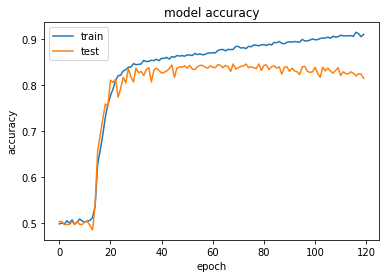

In [65]:
# Plotting the training

import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
# Test data evaluation

pred_results = model.predict(([inputs_test, queries_test]))

In [67]:
story =' '.join(word for word in test_data[0][0])
print("Story: ",story)
query = ' '.join(word for word in test_data[0][1])
print("Question: ",query)
print("True Test Answer from Data is:",test_data[0][2])

Story:  Mary got the milk there . John moved to the bedroom .
Question:  Is John in the kitchen ?
True Test Answer from Data is: no


In [68]:
#Generate prediction from model
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  no
Probability of certainty was:  0.99996257


In [69]:
# Let's write our own story
# Let's check the Vocabulary to choose correct words
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [70]:
# Note the whitespace of the periods as I told you before.
my_story = "John left the kitchen . Sandra dropped the football in the garden ."
my_story.split()

['John',
 'left',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden',
 '.']

In [0]:
# Note that period is considered as seperate token as in training set. This is the reason for that space.

In [0]:
my_question = "Is the football in the garden ?"

In [73]:
my_question.split()

['Is', 'the', 'football', 'in', 'the', 'garden', '?']

In [0]:
# Same logic for this question mark too.

In [0]:
mydata = [(my_story.split(),my_question.split(),'yes')]

In [0]:
my_story,my_ques,my_ans = vectorize_stories(mydata)

In [0]:
pred_results = model.predict(([ my_story, my_ques]))

In [78]:
#Generate prediction from model
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  no
Probability of certainty was:  0.9224698


In [0]:
# Thanks for reading my article. Have a great day.